In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pickle

In [248]:
dataset = pd.read_csv("cleaned_dataset.csv")

#Columns to drop during price prediction
columns_to_drop_price = ["Unnamed: 0", "BUILD_YEAR", "SOLD_YEAR", "LATITUDE", "LONGITUDE",
                        "PRICE_CATEGORY_HIGH", "PRICE_CATEGORY_MEDIUM", "PRICE_CATEGORY_LOW", "PRICE"]

#Columns to drop during distance prediction
columns_to_drop = ["Unnamed: 0", "BUILD_YEAR", "SOLD_YEAR", "LATITUDE", "LONGITUDE", "CBD_DIST", "NEAREST_STN_DIST",
                   "NEAREST_SCH_DIST","PRICE_CATEGORY_HIGH", "PRICE_CATEGORY_MEDIUM", "PRICE_CATEGORY_LOW", "PRICE"]

# PRICE

In [249]:
X = dataset.drop(columns=columns_to_drop_price, axis = 1)
Y = dataset["PRICE"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [250]:
#Price scaler model
scaler_price = MinMaxScaler()
scaler_price.fit(X_train)

MinMaxScaler()

In [251]:
X_train_transformed = scaler_price.transform(X_train)
X_test_transformed = scaler_price.transform(X_test)

In [252]:
price_model = DecisionTreeRegressor(max_depth=10)

price_model.fit(X_train_transformed, Y_train)

DecisionTreeRegressor(max_depth=10)

In [253]:
Y_Pred_Decision_Tree = price_model.predict(X_test_transformed)

In [254]:
Mean_Squared_Error = mean_squared_error(Y_test, Y_Pred_Decision_Tree)
Root_Mean_Squared_Error = mean_squared_error(Y_test, Y_Pred_Decision_Tree, squared=False)
Mean_Absolute_Error = mean_absolute_error(Y_test, Y_Pred_Decision_Tree)
R2_Score = r2_score(Y_test, Y_Pred_Decision_Tree)

print("Mean Squared Error : ",Mean_Squared_Error)
print("Root Mean Squared Error : ",Root_Mean_Squared_Error)
print("Mean Absolute Error : ",Mean_Absolute_Error)
print("R2 Score : ",R2_Score)

Mean Squared Error :  37444550349.70672
Root Mean Squared Error :  193505.94396479588
Mean Absolute Error :  123740.12297894697
R2 Score :  0.6200572034458914


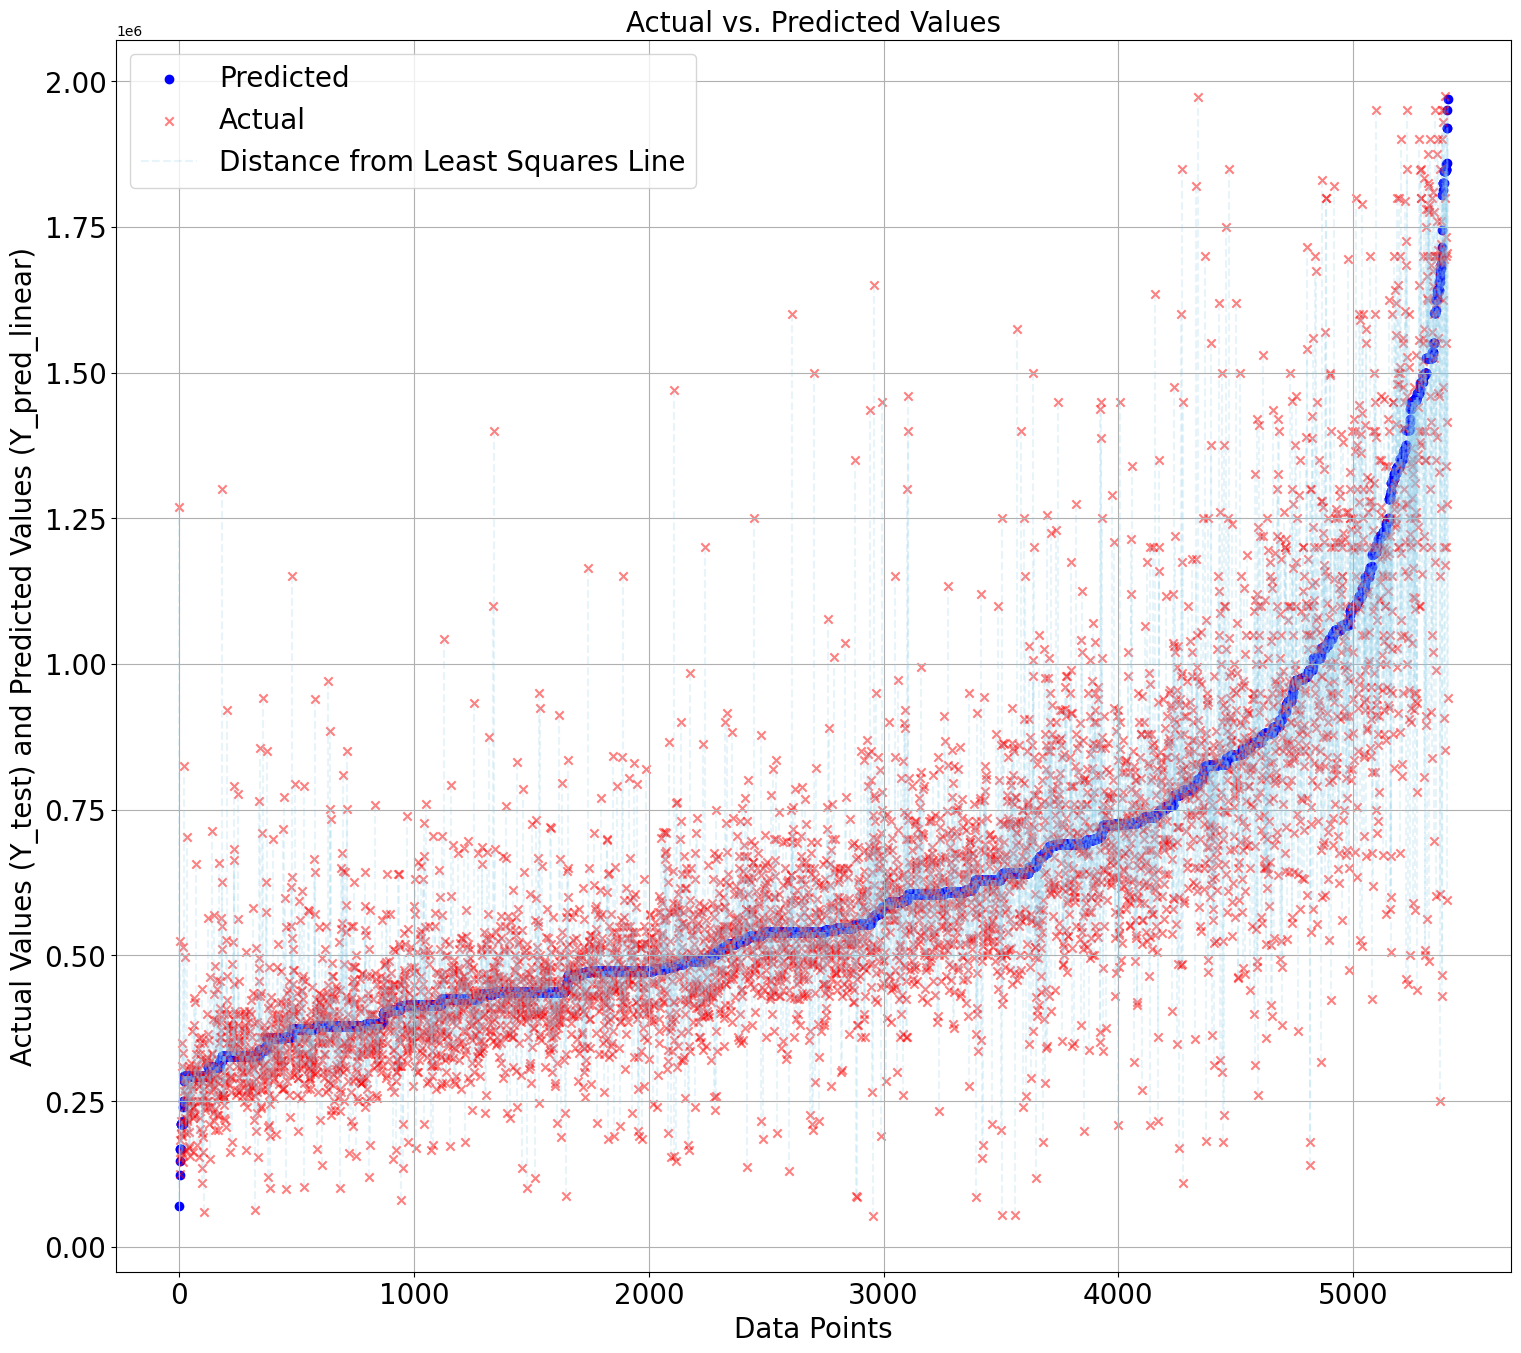

In [255]:
#Actual vs Predicted plot
data = {'Y_test': Y_test, 'Y_Pred_Decision_Tree': Y_Pred_Decision_Tree}

df = pd.DataFrame(data)

df_sorted = df.sort_values(by='Y_Pred_Decision_Tree')

plt.figure(figsize=(18,16))

plt.scatter(range(len(df_sorted)), df_sorted['Y_Pred_Decision_Tree'], color='blue', label='Predicted', marker='o')
plt.scatter(range(len(df_sorted)), df_sorted['Y_test'], color='red', label='Actual', marker='x', alpha=0.5)
plt.vlines(range(0,df_sorted.shape[0]), ymin=df_sorted['Y_test'], ymax=df_sorted['Y_Pred_Decision_Tree'], ls='--', colors="skyblue", label='Distance from Least Squares Line', alpha=0.2)

plt.xlabel('Data Points', fontsize=20)
plt.ylabel('Actual Values (Y_test) and Predicted Values (Y_pred_linear)', fontsize=20)
plt.title('Actual vs. Predicted Values', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='best', fontsize=20)

plt.grid(True)

plt.show()

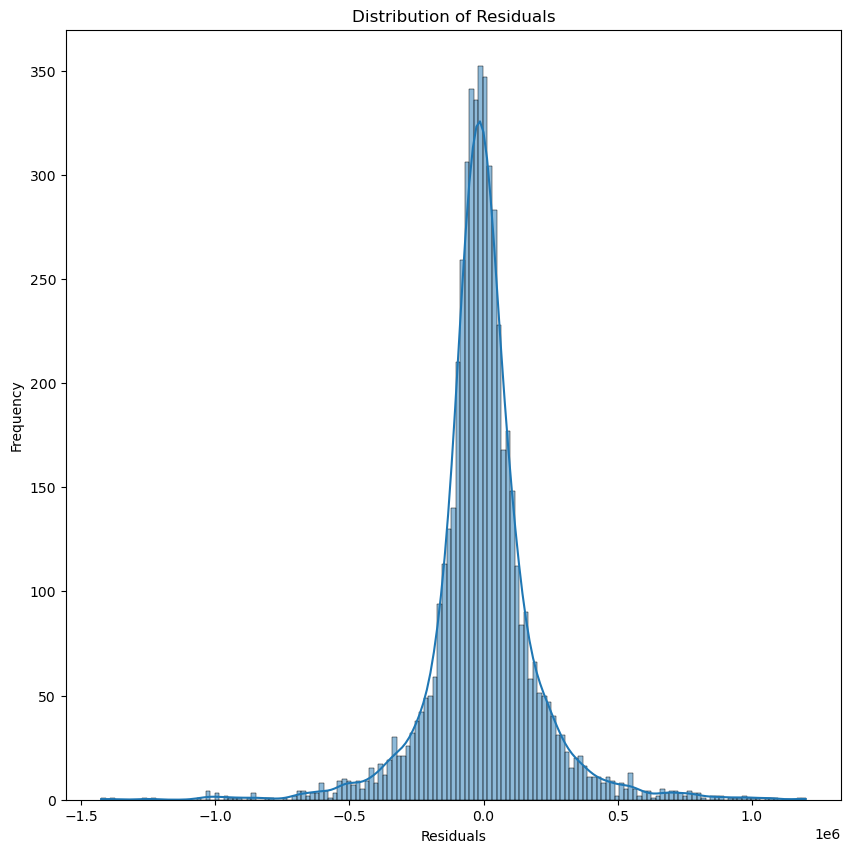

In [256]:
#Residuals Plot
Residuals = Y_test - Y_Pred_Decision_Tree

plt.figure(figsize=(10, 10))

sns.histplot(Residuals, kde=True)

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()

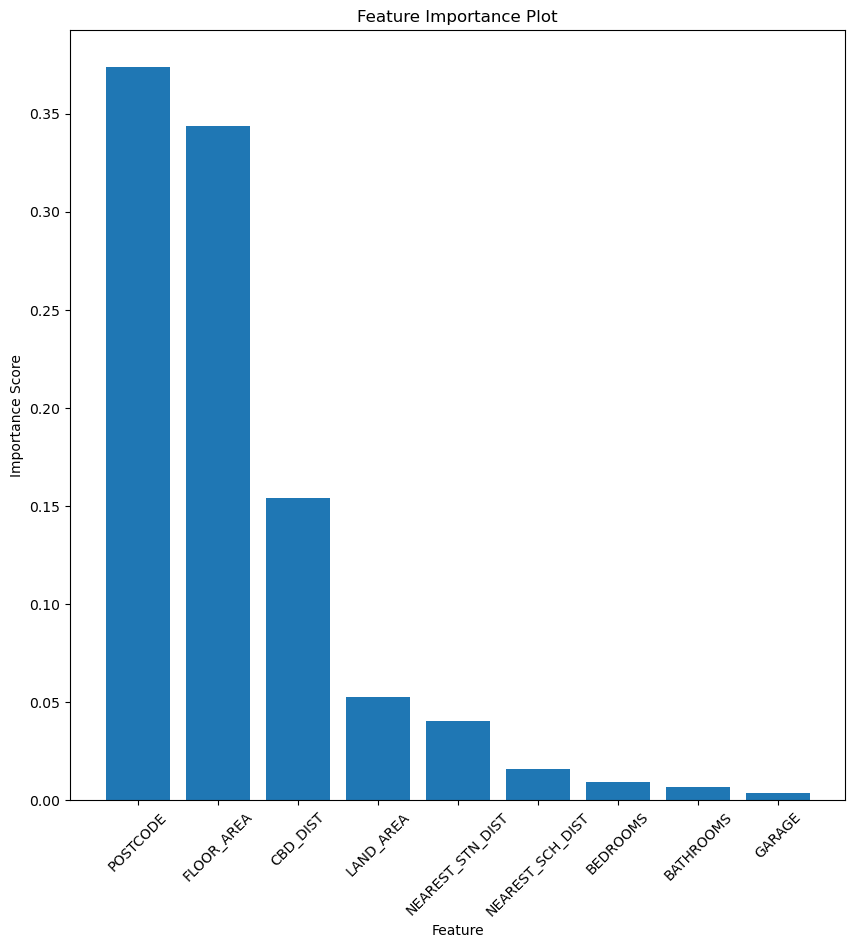

In [257]:
#Feature Importance Plot
feature_importances = price_model.feature_importances_
feature_names = X_train.columns

sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 10))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")

plt.title("Feature Importance Plot")

plt.xticks(range(len(feature_importances)), feature_names[sorted_idx], rotation=45)

plt.xlabel("Feature")
plt.ylabel("Importance Score")

plt.show()

# CBD Distance

In [258]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["CBD_DIST"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [259]:
#Scaler model for distance
scaler_others = MinMaxScaler()
scaler_others.fit(X_train)

MinMaxScaler()

In [260]:
X_train_transformed = scaler_others.transform(X_train)
X_test_transformed = scaler_others.transform(X_test)

In [261]:
cbd_model = DecisionTreeRegressor(max_depth=10)

cbd_model.fit(X_train_transformed, Y_train)

DecisionTreeRegressor(max_depth=10)

In [262]:
Y_Pred_Decision_Tree = cbd_model.predict(X_test_transformed)

In [263]:
Mean_Squared_Error = mean_squared_error(Y_test, Y_Pred_Decision_Tree)
Root_Mean_Squared_Error = mean_squared_error(Y_test, Y_Pred_Decision_Tree, squared=False)
Mean_Absolute_Error = mean_absolute_error(Y_test, Y_Pred_Decision_Tree)
R2_Score = r2_score(Y_test, Y_Pred_Decision_Tree)

print("Mean Squared Error : ",Mean_Squared_Error)
print("Root Mean Squared Error : ",Root_Mean_Squared_Error)
print("Mean Absolute Error : ",Mean_Absolute_Error)
print("R2 Score : ",R2_Score)

Mean Squared Error :  5706701.473170062
Root Mean Squared Error :  2388.8703341056544
Mean Absolute Error :  1648.636204050679
R2 Score :  0.9548664389641164


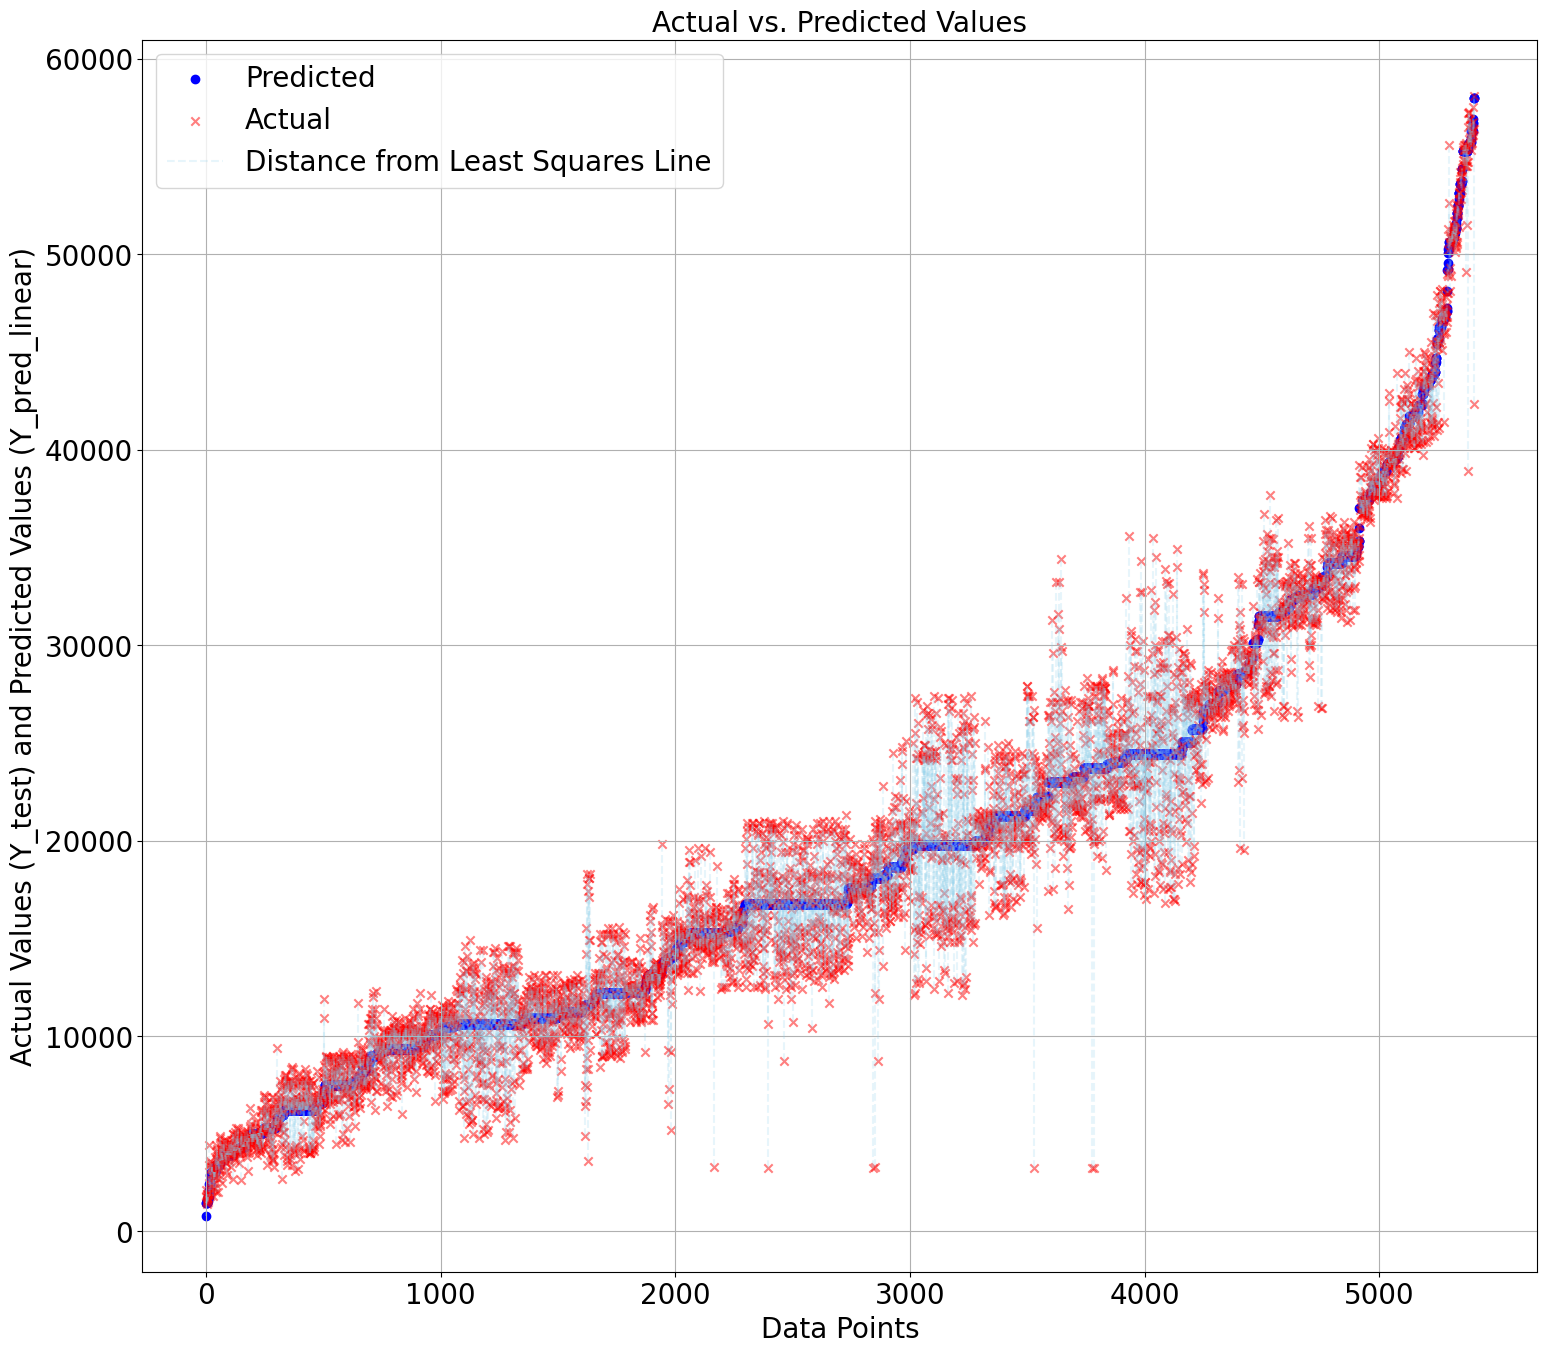

In [264]:
data = {'Y_test': Y_test, 'Y_Pred_Decision_Tree': Y_Pred_Decision_Tree}

df = pd.DataFrame(data)

df_sorted = df.sort_values(by='Y_Pred_Decision_Tree')

plt.figure(figsize=(18,16))

plt.scatter(range(len(df_sorted)), df_sorted['Y_Pred_Decision_Tree'], color='blue', label='Predicted', marker='o')
plt.scatter(range(len(df_sorted)), df_sorted['Y_test'], color='red', label='Actual', marker='x', alpha=0.5)
plt.vlines(range(0,df_sorted.shape[0]), ymin=df_sorted['Y_test'], ymax=df_sorted['Y_Pred_Decision_Tree'], ls='--', colors="skyblue", label='Distance from Least Squares Line', alpha=0.2)

plt.xlabel('Data Points', fontsize=20)
plt.ylabel('Actual Values (Y_test) and Predicted Values (Y_pred_linear)', fontsize=20)
plt.title('Actual vs. Predicted Values', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='best', fontsize=20)

plt.grid(True)

plt.show()

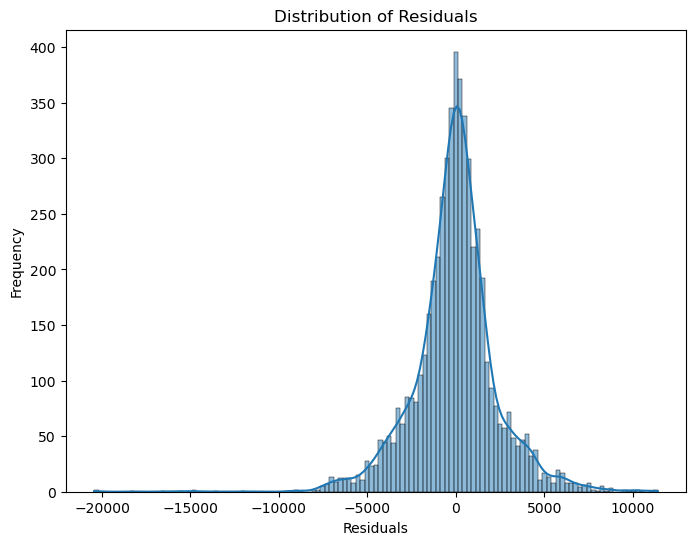

In [265]:
Residuals = Y_test - Y_Pred_Decision_Tree

plt.figure(figsize=(8, 6))

sns.histplot(Residuals, kde=True)

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()

# Station Distance

In [266]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["NEAREST_STN_DIST"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [267]:
station_model = DecisionTreeRegressor(max_depth=10)

station_model.fit(X_train_transformed, Y_train)

DecisionTreeRegressor(max_depth=10)

In [268]:
Y_Pred_Decision_Tree = station_model.predict(X_test_transformed)

In [269]:
Mean_Squared_Error = mean_squared_error(Y_test, Y_Pred_Decision_Tree)
Root_Mean_Squared_Error = mean_squared_error(Y_test, Y_Pred_Decision_Tree, squared=False)
Mean_Absolute_Error = mean_absolute_error(Y_test, Y_Pred_Decision_Tree)
R2_Score = r2_score(Y_test, Y_Pred_Decision_Tree)

print("Mean Squared Error : ",Mean_Squared_Error)
print("Root Mean Squared Error : ",Root_Mean_Squared_Error)
print("Mean Absolute Error : ",Mean_Absolute_Error)
print("R2 Score : ",R2_Score)

Mean Squared Error :  2706050.605194796
Root Mean Squared Error :  1645.0077827155699
Mean Absolute Error :  1115.5863482833613
R2 Score :  0.8315004697696524


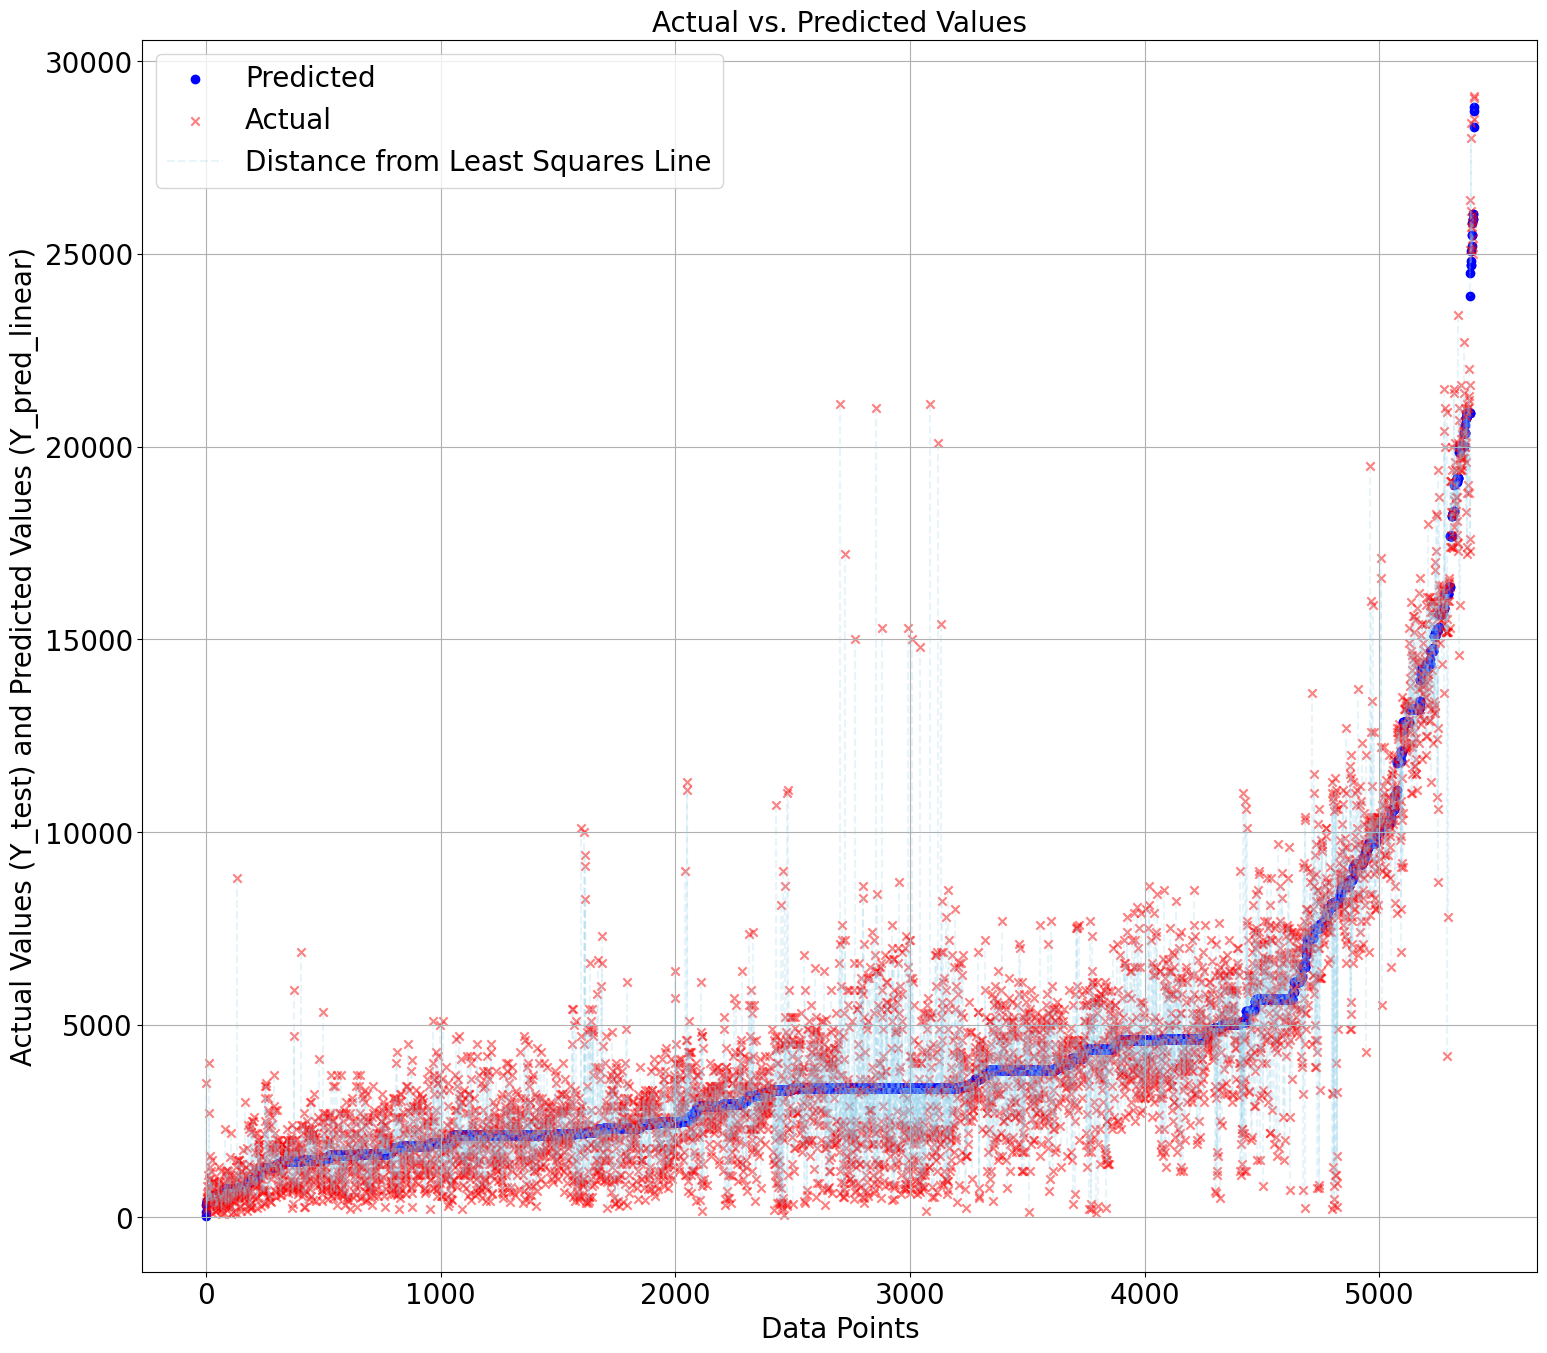

In [270]:
data = {'Y_test': Y_test, 'Y_Pred_Decision_Tree': Y_Pred_Decision_Tree}

df = pd.DataFrame(data)

df_sorted = df.sort_values(by='Y_Pred_Decision_Tree')

plt.figure(figsize=(18,16))

plt.scatter(range(len(df_sorted)), df_sorted['Y_Pred_Decision_Tree'], color='blue', label='Predicted', marker='o')
plt.scatter(range(len(df_sorted)), df_sorted['Y_test'], color='red', label='Actual', marker='x', alpha=0.5)
plt.vlines(range(0,df_sorted.shape[0]), ymin=df_sorted['Y_test'], ymax=df_sorted['Y_Pred_Decision_Tree'], ls='--', colors="skyblue", label='Distance from Least Squares Line', alpha=0.2)

plt.xlabel('Data Points', fontsize=20)
plt.ylabel('Actual Values (Y_test) and Predicted Values (Y_pred_linear)', fontsize=20)
plt.title('Actual vs. Predicted Values', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='best', fontsize=20)

plt.grid(True)

plt.show()

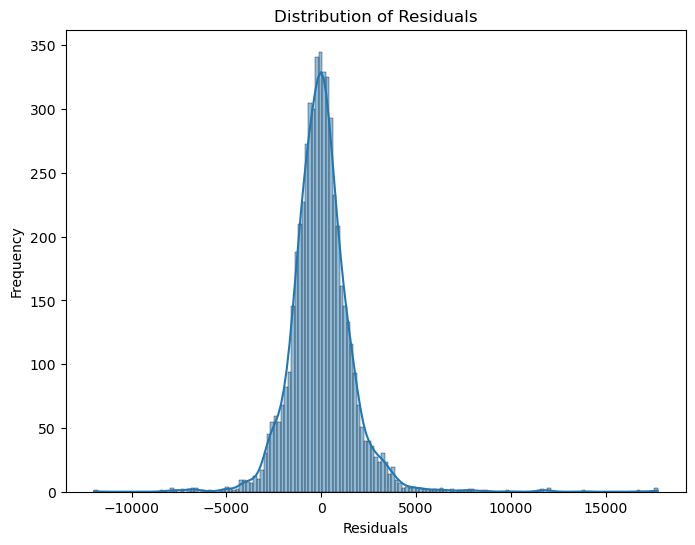

In [271]:
Residuals = Y_test - Y_Pred_Decision_Tree

plt.figure(figsize=(8, 6))

sns.histplot(Residuals, kde=True)

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()

# School Distance

In [272]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["NEAREST_SCH_DIST"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [273]:
school_model = DecisionTreeRegressor(max_depth=10)

school_model.fit(X_train_transformed, Y_train)

DecisionTreeRegressor(max_depth=10)

In [274]:
Y_Pred_Decision_Tree = school_model.predict(X_test_transformed)

In [275]:
Mean_Squared_Error = mean_squared_error(Y_test, Y_Pred_Decision_Tree)
Root_Mean_Squared_Error = mean_squared_error(Y_test, Y_Pred_Decision_Tree, squared=False)
Mean_Absolute_Error = mean_absolute_error(Y_test, Y_Pred_Decision_Tree)
R2_Score = r2_score(Y_test, Y_Pred_Decision_Tree)

print("Mean Squared Error : ",Mean_Squared_Error)
print("Root Mean Squared Error : ",Root_Mean_Squared_Error)
print("Mean Absolute Error : ",Mean_Absolute_Error)
print("R2 Score : ",R2_Score)

Mean Squared Error :  0.8449407934686658
Root Mean Squared Error :  0.9192066108708454
Mean Absolute Error :  0.6186996763669751
R2 Score :  0.5494227175278654


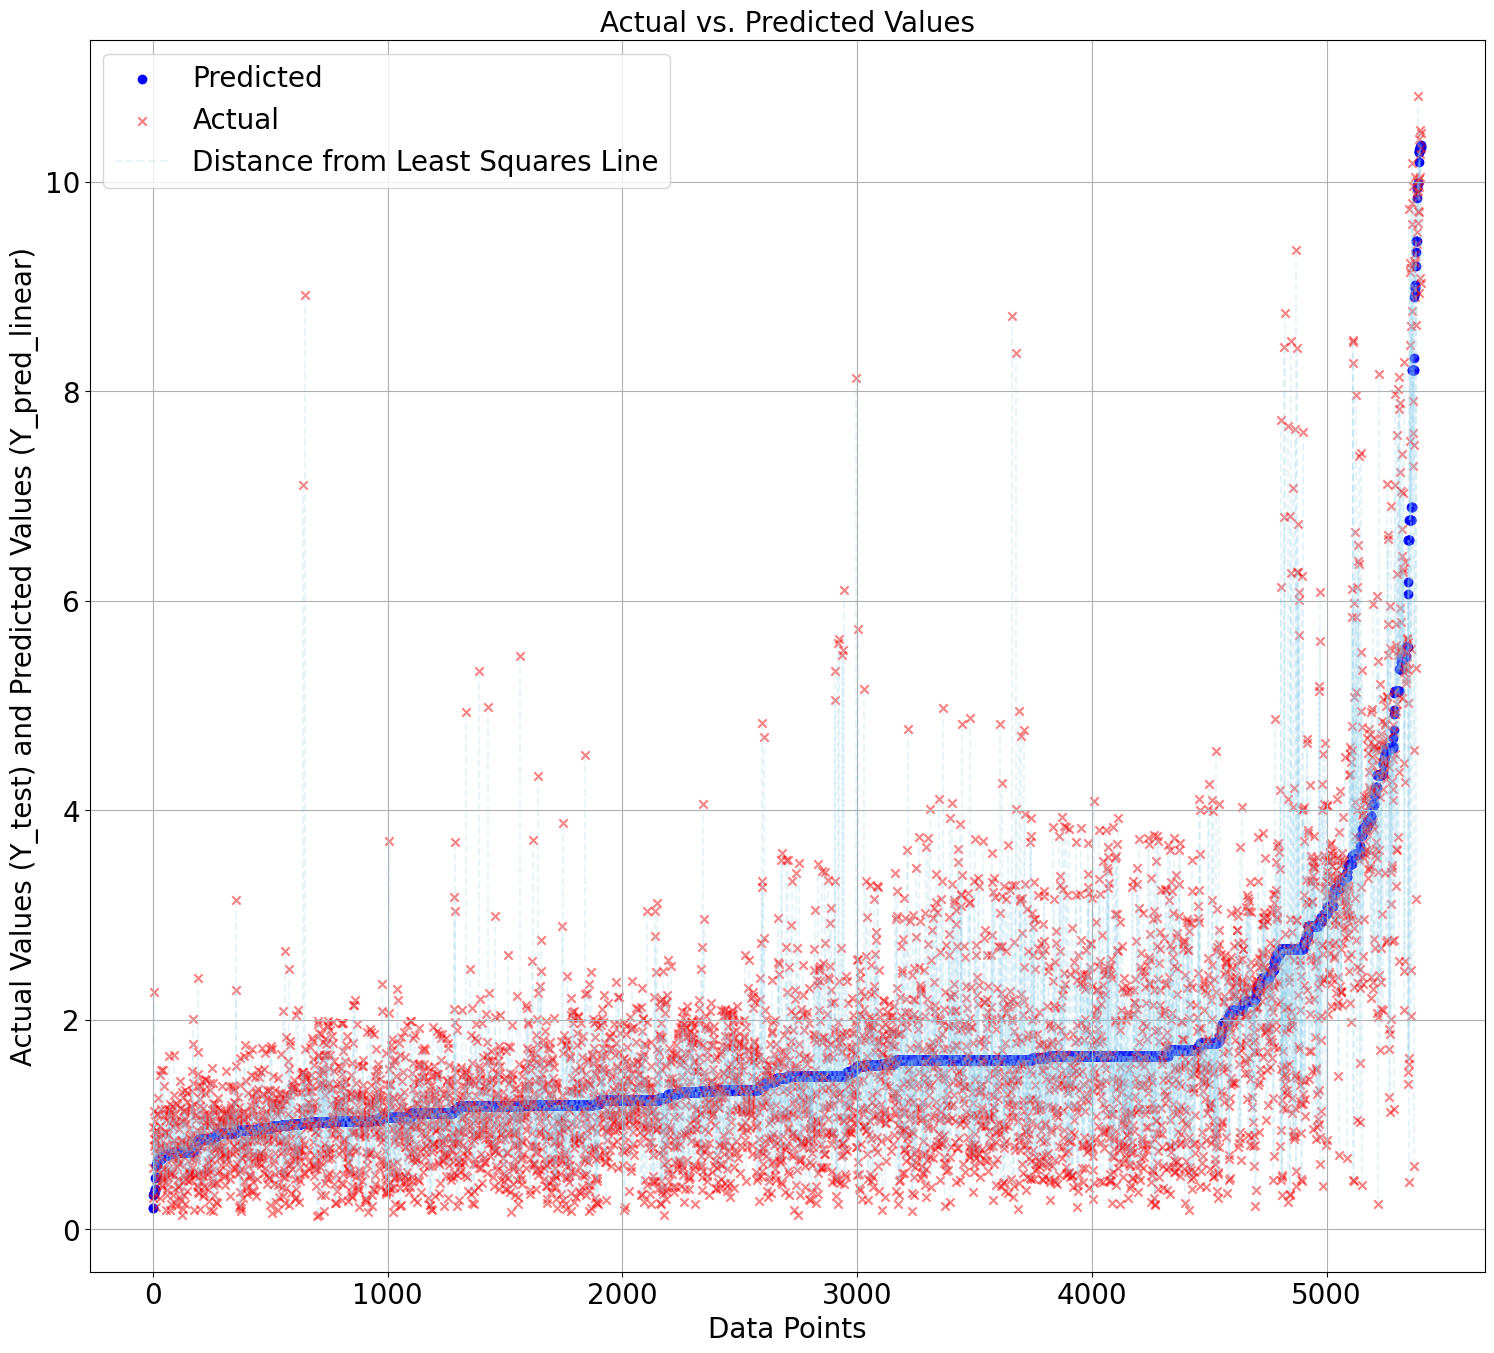

In [276]:
data = {'Y_test': Y_test, 'Y_Pred_Decision_Tree': Y_Pred_Decision_Tree}

df = pd.DataFrame(data)

df_sorted = df.sort_values(by='Y_Pred_Decision_Tree')

plt.figure(figsize=(18,16))

plt.scatter(range(len(df_sorted)), df_sorted['Y_Pred_Decision_Tree'], color='blue', label='Predicted', marker='o')
plt.scatter(range(len(df_sorted)), df_sorted['Y_test'], color='red', label='Actual', marker='x', alpha=0.5)
plt.vlines(range(0,df_sorted.shape[0]), ymin=df_sorted['Y_test'], ymax=df_sorted['Y_Pred_Decision_Tree'], ls='--', colors="skyblue", label='Distance from Least Squares Line', alpha=0.2)

plt.xlabel('Data Points', fontsize=20)
plt.ylabel('Actual Values (Y_test) and Predicted Values (Y_pred_linear)', fontsize=20)
plt.title('Actual vs. Predicted Values', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='best', fontsize=20)

plt.grid(True)

plt.show()

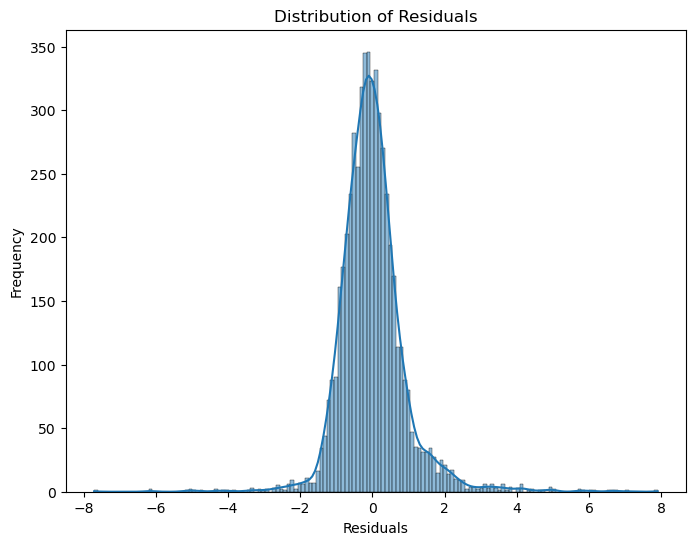

In [277]:
Residuals = Y_test - Y_Pred_Decision_Tree

plt.figure(figsize=(8, 6))

sns.histplot(Residuals, kde=True)

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()

# Saving All Models

In [278]:
pickle.dump(scaler_price, open("scaler_price_model.pkl", "wb"))
pickle.dump(scaler_others, open("scaler_others_model.pkl", "wb"))
pickle.dump(price_model, open("price_model.pkl", "wb"))
pickle.dump(cbd_model, open("cbd_model.pkl", "wb"))
pickle.dump(station_model, open("station_model.pkl", "wb"))
pickle.dump(school_model, open("school_model.pkl", "wb"))